In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [3]:
df = pd.read_csv("endpoints_40d9a7c4-6ca3-eb11-a2ce-c4346bcb1550.csv")

In [5]:
df.columns

Index(['year', 'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'burnin_approx_pfpr2_10', 'burnin_habitat_scale',
       'exe_collection_id', 'input_collection_id', 'ipt_on', 'Run_Number',
       'Received_Treatment', 'Received_Test', 'Received_Campaign_Drugs',
       'Received_RCD_Drugs', 'Received_SMC', 'Received_Ivermectin',
       'Received_Primaquine'],
      dtype='object')

In [34]:
foo = df.groupby(["ipt_on", "year", "burnin_approx_pfpr2_10"]).agg("mean").reset_index()
ipt = foo[foo["ipt_on"]==True].reset_index(drop=True)
base = foo[foo["ipt_on"]==False].reset_index(drop=True)

Text(0.5, 0, 'year')

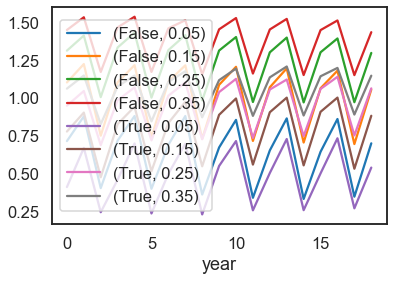

In [36]:
for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
    plt.plot(sdf["year"], sdf["clinical_incidence_all"], label=i)
plt.legend()
plt.xlabel("year")
# plt.ylim([0,1.4])

Text(0.5, 0, 'year')

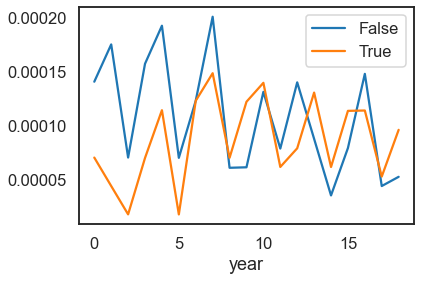

In [15]:
for i, sdf in foo.groupby("ipt_on"):
    plt.plot(sdf["year"], sdf["severe_incidence16_500"], label=i)
plt.legend()
plt.xlabel("year")
# plt.ylim([0,1.4])

Text(0, 0.5, 'fractional reduction')

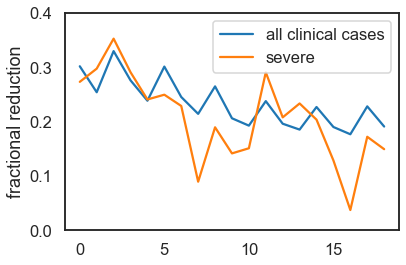

In [24]:
plt.plot(ipt["year"], (base["clinical_incidence_all"]-ipt["clinical_incidence_all"])/base["clinical_incidence_all"], label="all clinical cases")
plt.plot(ipt["year"], (base["severe_incidence_all"]-ipt["severe_incidence_all"])/base["severe_incidence_all"], label="severe")
plt.ylim([0,0.4])
plt.legend()
plt.ylabel("fractional reduction")

Text(0.5, 1.0, 'All cases')

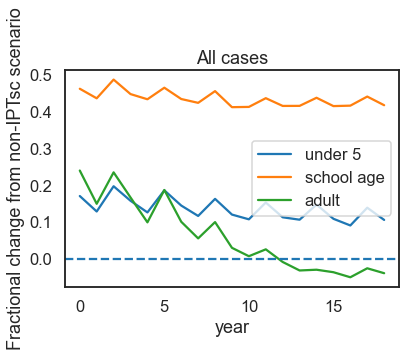

In [31]:
plt.plot(ipt["year"], (base["clinical_incidence0_5"]-ipt["clinical_incidence0_5"])/base["clinical_incidence0_5"], label="under 5")
plt.plot(ipt["year"], (base["clinical_incidence6_15"]-ipt["clinical_incidence6_15"])/base["clinical_incidence6_15"], label="school age")
plt.plot(ipt["year"], (base["clinical_incidence16_500"]-ipt["clinical_incidence16_500"])/base["clinical_incidence16_500"], label="adult")

plt.axhline(0,linestyle='dashed')

plt.ylabel("Fractional change from non-IPTsc scenario")
plt.xlabel("year")

plt.legend()
plt.title("All cases")

Text(0.5, 1.0, 'Severe cases')

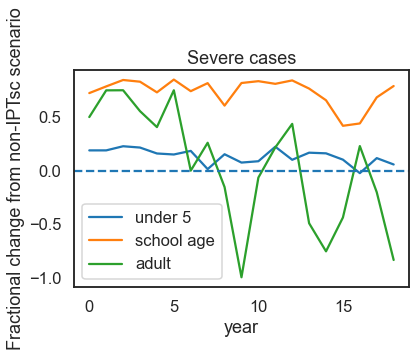

In [33]:
plt.plot(ipt["year"], (base["severe_incidence0_5"]-ipt["severe_incidence0_5"])/base["severe_incidence0_5"], label="under 5")
plt.plot(ipt["year"], (base["severe_incidence6_15"]-ipt["severe_incidence6_15"])/base["severe_incidence6_15"], label="school age")
plt.plot(ipt["year"], (base["severe_incidence16_500"]-ipt["severe_incidence16_500"])/base["severe_incidence16_500"], label="adult")

plt.axhline(0,linestyle='dashed')

plt.ylabel("Fractional change from non-IPTsc scenario")
plt.xlabel("year")

plt.legend()
plt.title("Severe cases")

(0.0, 1.4)

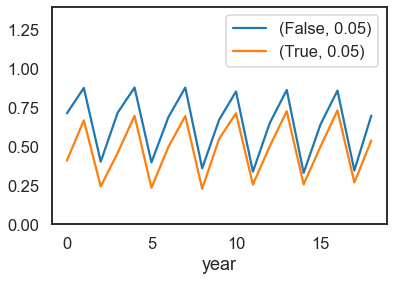

In [38]:
for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
    if i[1] == 0.05:
        plt.plot(sdf["year"], sdf["clinical_incidence_all"], label=i)
plt.legend()
plt.xlabel("year")
plt.ylim([0,1.4])

(0.0, 1.6)

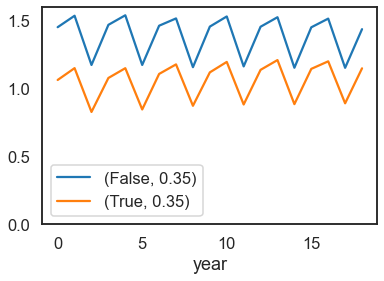

In [40]:
for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
    if i[1] == 0.35:
        plt.plot(sdf["year"], sdf["clinical_incidence_all"], label=i)
plt.legend()
plt.xlabel("year")
plt.ylim([0,1.6])

In [46]:
def plot_field_for_all_transmission_bins(key):
    plt.figure(figsize=(10,10), dpi=300)
    plt.subplot(221)
    for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
        if i[1] == 0.05:
            plt.plot(sdf["year"], sdf[key], label=i)
            
    plt.subplot(222)
    for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
        if i[1] == 0.15:
            plt.plot(sdf["year"], sdf[key], label=i)
            
    plt.subplot(223)
    for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
        if i[1] == 0.25:
            plt.plot(sdf["year"], sdf[key], label=i)
            
    plt.subplot(224)
    for i, sdf in foo.groupby(["ipt_on", "burnin_approx_pfpr2_10"]):
        if i[1] == 0.35:
            plt.plot(sdf["year"], sdf[key], label=i)

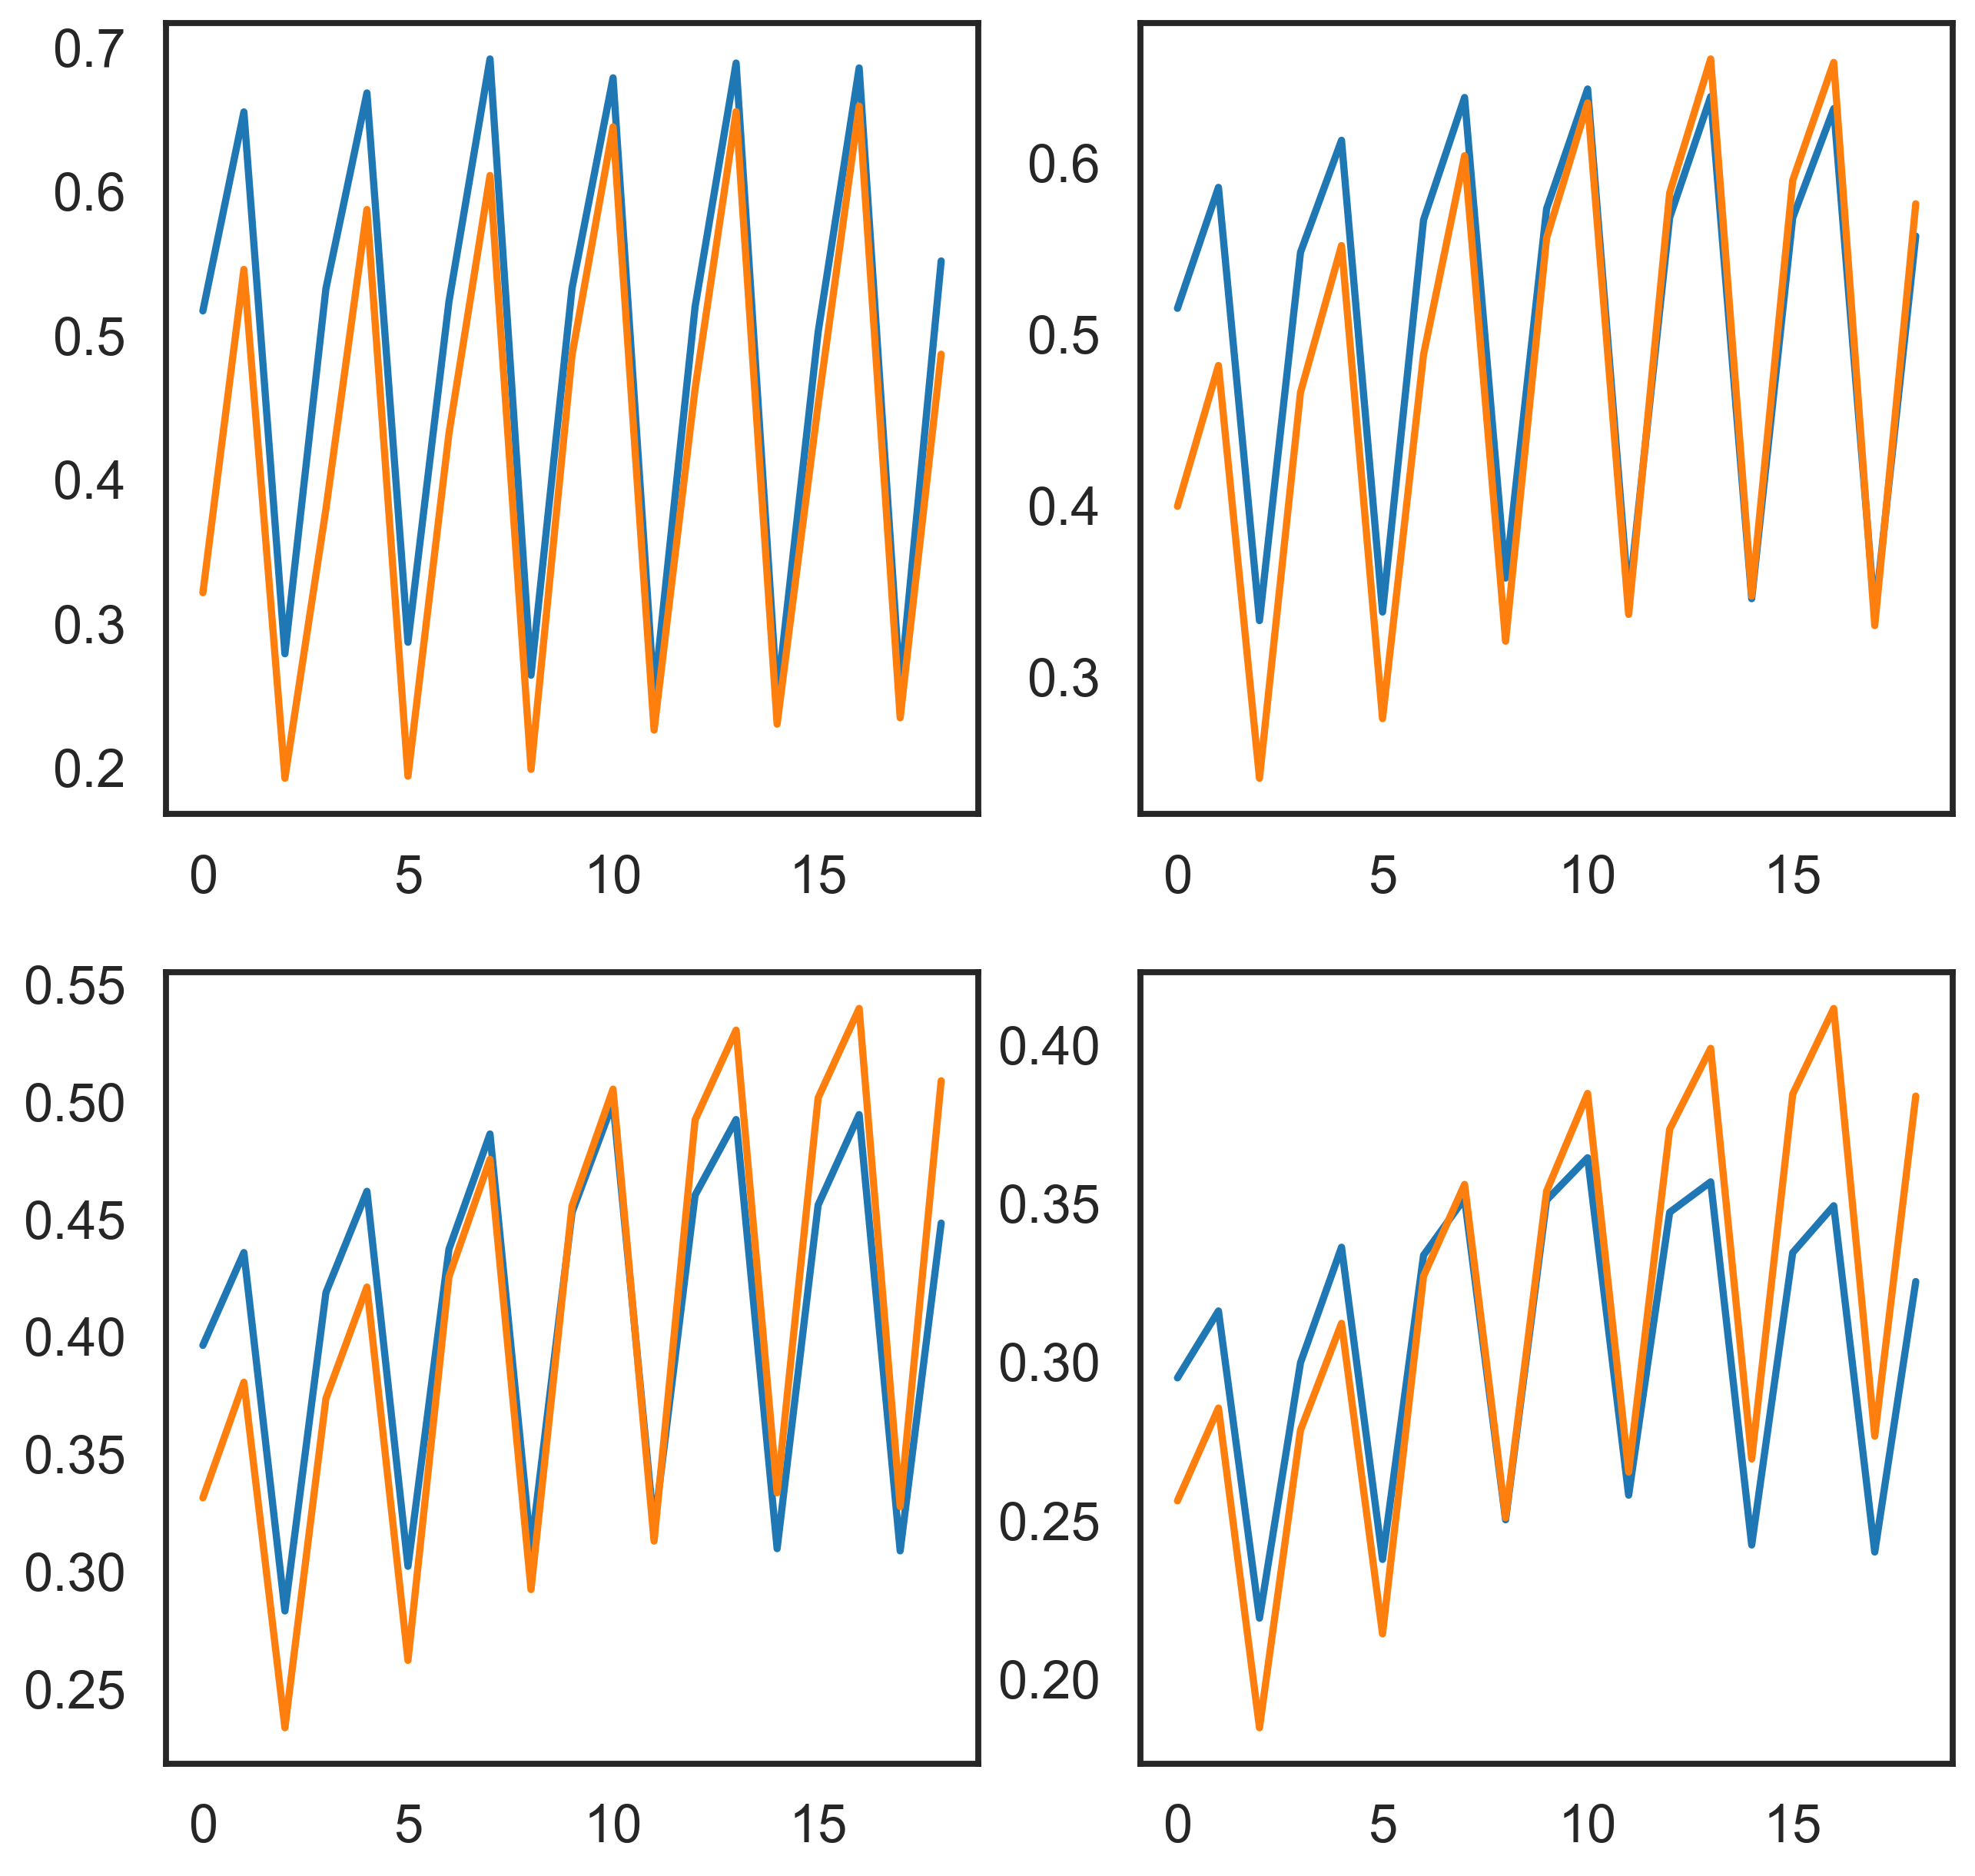

In [51]:
plot_field_for_all_transmission_bins("clinical_incidence16_500")

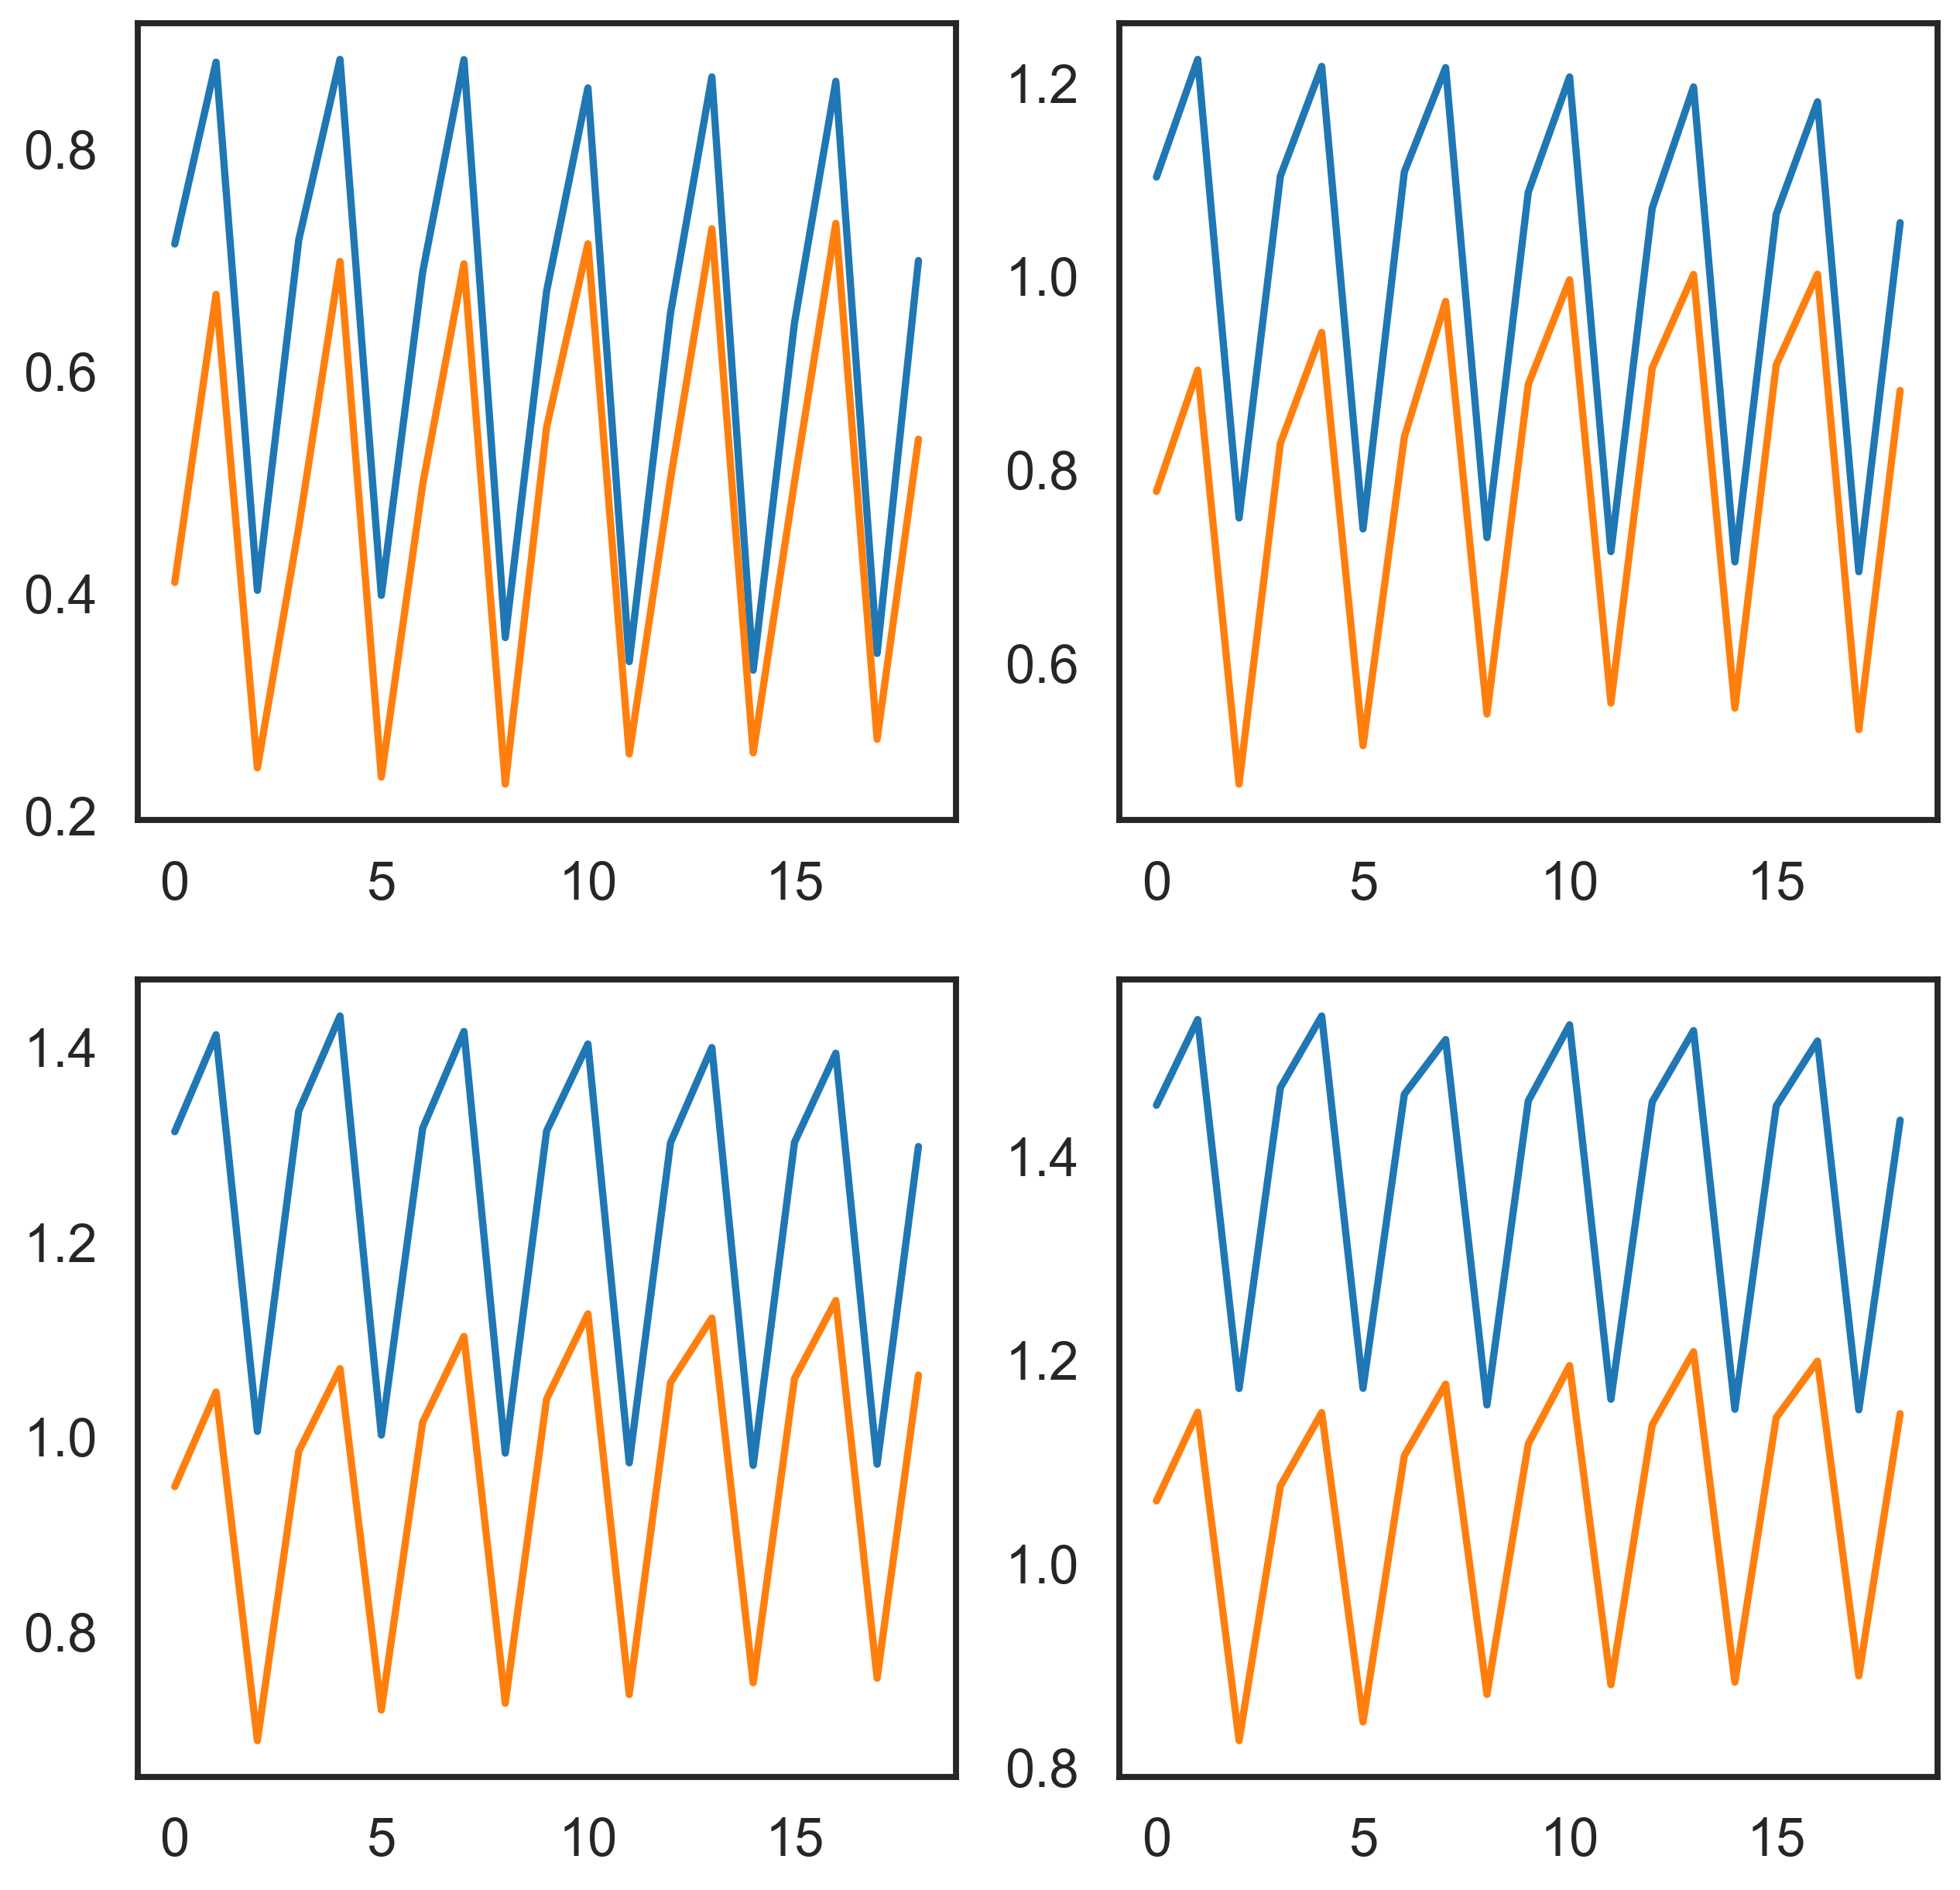

In [53]:
plot_field_for_all_transmission_bins("clinical_incidence_all")